In [140]:
import json 
import pandas as pd 
import numpy as np 
import os 
import re 
import seaborn as sns 
import matplotlib.pyplot as plt
from omegaconf import OmegaConf 
from glob import glob 
os.chdir('../')

def load_df(log_dir):
    with open(log_dir, 'r') as f: 
        data = f.readlines()
    df = pd.DataFrame(list(pd.Series(data).map(eval).values))    
    return df 

def load_log_data(class_name, version, result_dir,method):

    df = pd.DataFrame()
    for i,v in enumerate(version):
        log_dir = os.path.join(result_dir,class_name,method,v,'log.txt')
        
        temp_df = load_df(log_dir)
        temp_df['hue'] = v 
        
        df = pd.concat([df,temp_df])
    
    return df 

def plot_log(data,class_name, metrics:list, figsize:tuple = (10,7)):
    
    fig, axes = plt.subplots(len(metrics),1,figsize=figsize)
    
    for ax, metric in zip(axes, metrics):
        sns.lineplot(
            x = 'epoch',
            y = metric,
            data = data,
            hue = data['hue'],
            ax = ax 
        )
      
    fig.suptitle(class_name)
    plt.show()
    
def read_txt(log_dir):
    with open(log_dir, 'r') as f: 
        data = f.readlines()    
    df = pd.DataFrame([eval(d) for d in data]) 
    return df 
pd.options.display.float_format = '{: .3f}'.format 

def temperature_matching(x):
    value = x.split('_')[-1]
    
    if value in ['BASELINE','focalloss']:
        return 0.05 
    elif value in ['T1','T2']:
        return float(value[-1])
    else:
        if len(value) ==1:
            return value 
        else:
            return re.search(r'T_(\d+\.\d+)', x).group(1)
    

# 전체 결과 

In [141]:
log_dirs = pd.Series(glob(f'/Volume/VAD/ProxyCore/results/CoreInit/MVTecAD/*/BASELINE_proxy_core_confidence_score_noisy_dataset-anomaly_ratio_*/*/result.txt'))
log_dirs = log_dirs[log_dirs.apply(lambda x : 'BASELINE' in x )].values
df = pd.DataFrame()

for log_dir in log_dirs:
    auroc_list = {}
    method = log_dir.split('/')[-6]
    dataset = log_dir.split('/')[-5]
    class_name = log_dir.split('/')[-4]
    exp_name = log_dir.split('/')[-3].split('-a')[0]
    

    
    data = load_df(log_dir)

    met = [d['pix_level']['average_precision'] for d in data['test_metrics']]    
        
    idx = np.argmax(met)
    
    result = pd.DataFrame(data['test_metrics'][idx])
    result = result.reset_index().melt(['index'])
    result.columns = ['metric','level','value']
    
    if exp_name == 'baseline_yen':
        method = 'softpatch-yen'
    anomaly_ratio = float(log_dir.split('/')[-3].split('_')[-1])
    
    for c in ['method','dataset','class_name','exp_name','anomaly_ratio']:
        result[c] = eval(c) 
    
    # Coreinit Option 
    if method == 'CoreInit':
        # Sampling Ratio 
        configs = OmegaConf.load(log_dir.replace('result.txt','configs.yaml'))
        sampling_ratio = configs.MODEL.params.sampling_ratio
        result['sampling_ratio'] = sampling_ratio 
        
        if 'pslabel_sampling_ratio' in configs.MODEL.params:
            pslabel_sampling_ratio = configs.MODEL.params.pslabel_sampling_ratio
            result['pslabel_sampling_ratio'] = pslabel_sampling_ratio
        else:
            result['pslabel_sampling_ratio'] = sampling_ratio
            
        if 'temperature' in configs.MODEL.params:
            result['Temperature'] = configs.MODEL.params.temperature
        else:
            result['Temperature'] = 0.05 
    result['method'] = 'noise_aware_coreinit'
    df = pd.concat([df,result])



In [142]:
log_dirs = pd.Series(glob(f'/Volume/VAD/ProxyCore/results/CoreInit/MVTecAD/*/BASELINE_proxy_core_baseline_noisy_dataset-anomaly_ratio_*/*/result.txt'))
log_dirs = log_dirs[log_dirs.apply(lambda x : 'BASELINE' in x )].values

for log_dir in log_dirs:
    auroc_list = {}
    method = log_dir.split('/')[-6]
    dataset = log_dir.split('/')[-5]
    class_name = log_dir.split('/')[-4]
    exp_name = log_dir.split('/')[-3].split('-a')[0]
    

    
    data = load_df(log_dir)

    met = [d['pix_level']['average_precision'] for d in data['test_metrics']]    
        
    idx = np.argmax(met)
    
    result = pd.DataFrame(data['test_metrics'][idx])
    result = result.reset_index().melt(['index'])
    result.columns = ['metric','level','value']
    
    if exp_name == 'baseline_yen':
        method = 'softpatch-yen'
    anomaly_ratio = float(log_dir.split('/')[-3].split('_')[-1])
    
    for c in ['method','dataset','class_name','exp_name','anomaly_ratio']:
        result[c] = eval(c) 
    
    # Coreinit Option 
    if method == 'CoreInit':
        # Sampling Ratio 
        configs = OmegaConf.load(log_dir.replace('result.txt','configs.yaml'))
        sampling_ratio = configs.MODEL.params.sampling_ratio
        result['sampling_ratio'] = sampling_ratio 
        
        if 'pslabel_sampling_ratio' in configs.MODEL.params:
            pslabel_sampling_ratio = configs.MODEL.params.pslabel_sampling_ratio
            result['pslabel_sampling_ratio'] = pslabel_sampling_ratio
        else:
            result['pslabel_sampling_ratio'] = sampling_ratio
            
        if 'temperature' in configs.MODEL.params:
            result['Temperature'] = configs.MODEL.params.temperature
        else:
            result['Temperature'] = 0.05 
        
    df = pd.concat([df,result])



In [143]:

log_dirs = pd.Series(glob(f'/Volume/VAD/ProxyCore/results/SoftPatch/MVTecAD/*/*-sampling_ratio_0.1-anomaly_ratio_*/*/result.txt'))

for log_dir in log_dirs:
    auroc_list = {}
    method = log_dir.split('/')[-6]
    dataset = log_dir.split('/')[-5]
    class_name = log_dir.split('/')[-4]
    exp_name = log_dir.split('/')[-3].split('-a')[0]
    

    
    data = load_df(log_dir)

    met = [d['pix_level']['average_precision'] for d in data['test_metrics']]    
        
    idx = np.argmax(met)
    
    result = pd.DataFrame(data['test_metrics'][idx])
    result = result.reset_index().melt(['index'])
    result.columns = ['metric','level','value']
    
    if 'yen' in log_dir:
        method = 'softpatch-yen'
    anomaly_ratio = float(log_dir.split('/')[-3].split('_')[-1])
    
    for c in ['method','dataset','class_name','exp_name','anomaly_ratio']:
        result[c] = eval(c) 
    
    # Coreinit Option 
    if method == 'CoreInit':
        # Sampling Ratio 
        configs = OmegaConf.load(log_dir.replace('result.txt','configs.yaml'))
        sampling_ratio = configs.MODEL.params.sampling_ratio
        result['sampling_ratio'] = sampling_ratio 
        
        if 'pslabel_sampling_ratio' in configs.MODEL.params:
            pslabel_sampling_ratio = configs.MODEL.params.pslabel_sampling_ratio
            result['pslabel_sampling_ratio'] = pslabel_sampling_ratio
        else:
            result['pslabel_sampling_ratio'] = sampling_ratio
            
        if 'temperature' in configs.MODEL.params:
            result['Temperature'] = configs.MODEL.params.temperature
        else:
            result['Temperature'] = 0.05 
        
    df = pd.concat([df,result])
    

In [144]:
log_dirs = pd.Series(glob(f'/Volume/VAD/ProxyCore/results/PatchCore/MVTecAD/*/baseline-identity-sampling_ratio_0.1-anomaly_ratio_*/*/result.txt'))

for log_dir in log_dirs:
    auroc_list = {}
    method = log_dir.split('/')[-6]
    dataset = log_dir.split('/')[-5]
    class_name = log_dir.split('/')[-4]
    exp_name = log_dir.split('/')[-3].split('-a')[0]
    

    
    data = load_df(log_dir)

    met = [d['pix_level']['average_precision'] for d in data['test_metrics']]    
        
    idx = np.argmax(met)
    
    result = pd.DataFrame(data['test_metrics'][idx])
    result = result.reset_index().melt(['index'])
    result.columns = ['metric','level','value']
    
    if 'yen' in log_dir:
        method = 'softpatch-yen'
    anomaly_ratio = float(log_dir.split('/')[-3].split('_')[-1])
    
    for c in ['method','dataset','class_name','exp_name','anomaly_ratio']:
        result[c] = eval(c) 
    
    # Coreinit Option 
    if method == 'CoreInit':
        # Sampling Ratio 
        configs = OmegaConf.load(log_dir.replace('result.txt','configs.yaml'))
        sampling_ratio = configs.MODEL.params.sampling_ratio
        result['sampling_ratio'] = sampling_ratio 
        
        if 'pslabel_sampling_ratio' in configs.MODEL.params:
            pslabel_sampling_ratio = configs.MODEL.params.pslabel_sampling_ratio
            result['pslabel_sampling_ratio'] = pslabel_sampling_ratio
        else:
            result['pslabel_sampling_ratio'] = sampling_ratio
            
        if 'temperature' in configs.MODEL.params:
            result['Temperature'] = configs.MODEL.params.temperature
        else:
            result['Temperature'] = 0.05 
        
    df = pd.concat([df,result])
    

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(40, 30))

# iterate over class names and their index
for i, class_name in enumerate(df['class_name'].unique()):
    # calculate row and column index for the current subplot
    row = i // 4
    column = i % 4
    
    # select the appropriate axis for the current subplot
    ax = axes[row, column]
    
    sns.lineplot(
        x='anomaly_ratio',
        y='value',
        hue='method',
        data=df[
            (df['metric'] == 'average_precision') &
            (df['level'] == 'pix_level') &
            (df['class_name'] == class_name)
        ],
        ax=ax
    )
    
    # set the title for the current subplot
    ax.set_title(class_name)

# Adjust layout to make sure titles and labels are not overlapping
plt.tight_layout()
plt.show()


In [185]:
df.loc[df['method']=='CoreInit','method'] = 'ProxyCore'

<ipython-input-186-53b7d2182cab>:8: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  data = df[
<ipython-input-186-53b7d2182cab>:8: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  data = df[
<ipython-input-186-53b7d2182cab>:8: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  data = df[
<ipython-input-186-53b7d2182cab>:8: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In 

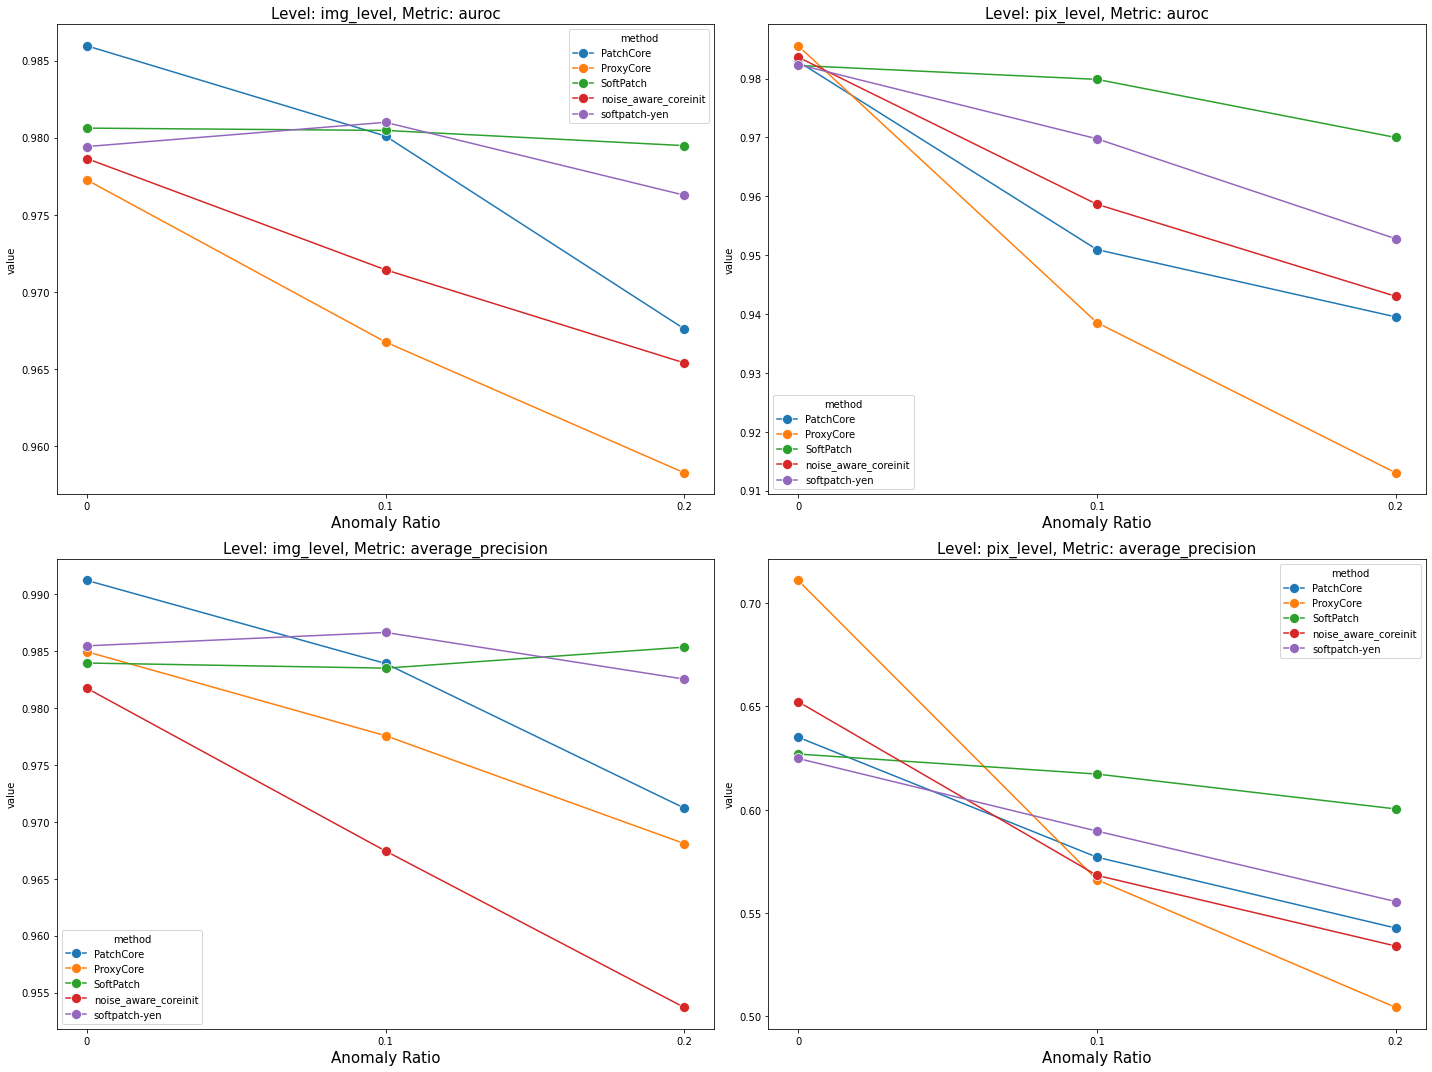

In [186]:
fig, axes = plt.subplots(2,2, figsize=(20,15))

for i, metric in enumerate(['auroc','average_precision']):
    for j, level in enumerate(['img_level','pix_level']):
        
        ax = axes[i,j]
        
        data = df[
            (df['metric']==metric)&
            (df['level']==level)
               ].pivot_table(
                        index = ['method'],
                        columns = ['anomaly_ratio'],
                        values = ['value']
                    ).reset_index().melt(id_vars=['method'])
               
        
        sns.lineplot(
            x='anomaly_ratio',
            y='value',
            hue='method',
            data=data,
            marker='o',  # Mark points with 'o'
            ax=ax,
            markersize=10  # Increase marker size

        )
        
        # Set the title
        ax.set_title(f"Level: {level}, Metric: {metric}", fontsize=15)
        
        # Set the x-ticks and labels
        ax.set_xticks([0, 0.1, 0.2])
        ax.set_xticklabels(['0', '0.1', '0.2'])
        ax.set_xlabel('Anomaly Ratio', fontsize=15)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='anomaly_ratio', ylabel='value'>

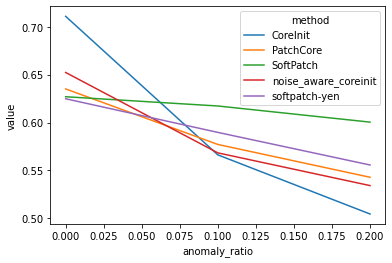

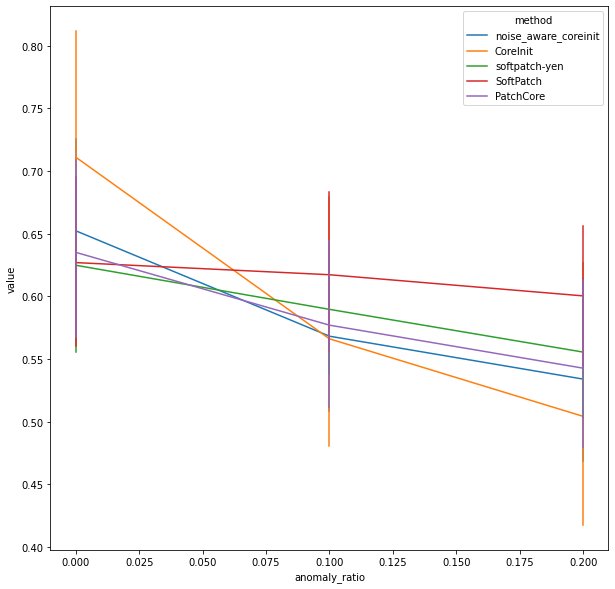

<Figure size 432x288 with 0 Axes>

In [147]:
plt.figure(figsize=(10,10))
sns.lineplot(
    x='anomaly_ratio',
    y='value',
    hue='method',
    data=df[
        (df['metric'] == 'average_precision') &
        (df['level'] == 'pix_level')
    ],
    err_style="bars"
)

plt.show()
plt.tight_layout()